## Prédiction de prix d'une automobile : régression linéaire

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv('annonces_auto.csv')

In [59]:

df.head()

,marque,version,annee,kilometrage,energie,emission_C02,consommation_mixte,transmission,portes,puissance_fiscale,places,lieu,prix
0,Renault,Modus 1.5 dCi 80 Confort Dynamique,2004.0,156000.0,Diesel,122.0,4.6,Manuelle,4.0,5.0,5.0,81300,3700.0
1,Renault,Mégane IV Berline TCe 140 EDC FAP Business,2019.0,4700.0,Essence,125.0,5.5,Automatique,4.0,7.0,5.0,85800,18500.0
2,Renault,Clio E-Tech 140 - 21N Intens,2022.0,2000.0,Hybride,NaN,NaN,Automatique,4.0,5.0,5.0,83400,21700.0
3,Toyota,Edition 1.8 hybrid 122ch,2022.0,10.0,Hybride,NaN,NaN,Automatique,4.0,5.0,NaN,NaN,27470.0
4,Renault,Laguna 1.9 DTI RTE,1999.0,320000.0,Diesel,NaN,5.5,Manuelle,4.0,6.0,5.0,28400,2000.0


In [60]:
df.shape

(2464, 13)

In [61]:
for lab in df.keys():
    if (len(df[lab].unique())<11):
        print(lab , " : ", df[lab].unique())

energie  :  ['Diesel' 'Essence' 'Hybride' 'Autres' nan 'GPL ou GNL' 'Electrique']
transmission  :  ['Manuelle' 'Automatique' 'Semi automatique' nan 'Autres']
portes  :  [ 4.  2. nan  5.]
places  :  [ 5. nan  4.  2.  7.  8.  6.  9.  3.]


In [17]:
df.keys()

Index(['marque', 'version', 'annee', 'kilometrage', 'energie', 'emission_C02',
       'consommation_mixte', 'transmission', 'portes', 'puissance_fiscale',
       'places', 'lieu', 'prix'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2465 entries, 0 to 2464
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   marque              2465 non-null   object 
 1   version             2096 non-null   object 
 2   annee               2455 non-null   float64
 3   kilometrage         2454 non-null   float64
 4   energie             2426 non-null   object 
 5   emission_C02        1598 non-null   object 
 6   consommation_mixte  1497 non-null   float64
 7   transmission        2347 non-null   object 
 8   portes              2448 non-null   object 
 9   puissance_fiscale   2360 non-null   float64
 10  places              2389 non-null   float64
 11  lieu                1701 non-null   object 
 12  prix                2457 non-null   float64
dtypes: float64(6), object(7)
memory usage: 250.5+ KB


In [19]:
df.isnull().sum()

marque                  0
version               369
annee                  10
kilometrage            11
energie                39
emission_C02          867
consommation_mixte    968
transmission          118
portes                 17
puissance_fiscale     105
places                 76
lieu                  764
prix                    8
dtype: int64

### EDA

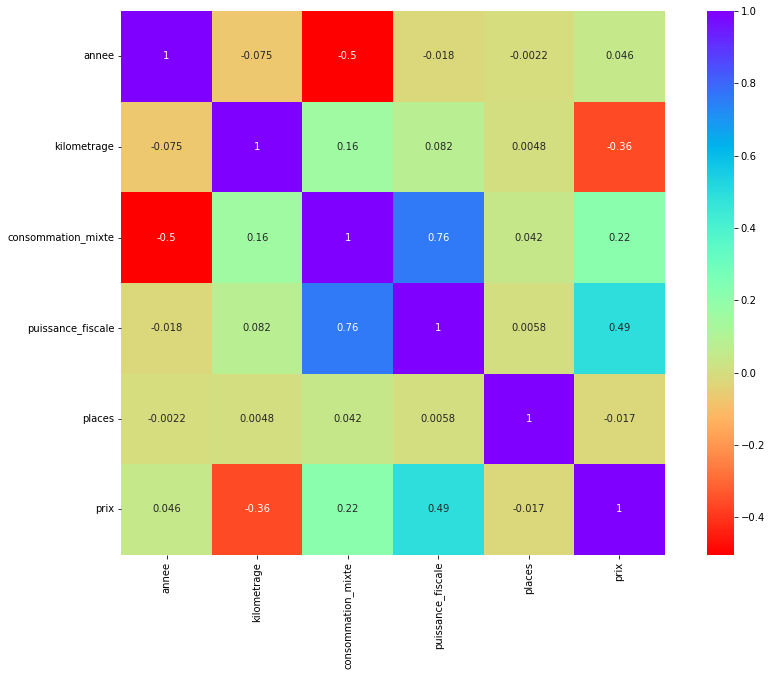

In [20]:
plt.subplots(figsize=(15,10))
sns_plot = sns.heatmap(df.corr(),annot =True,cmap='rainbow_r',square=True)
fig = sns_plot.get_figure()
fig.savefig("corrHeatmap.png")

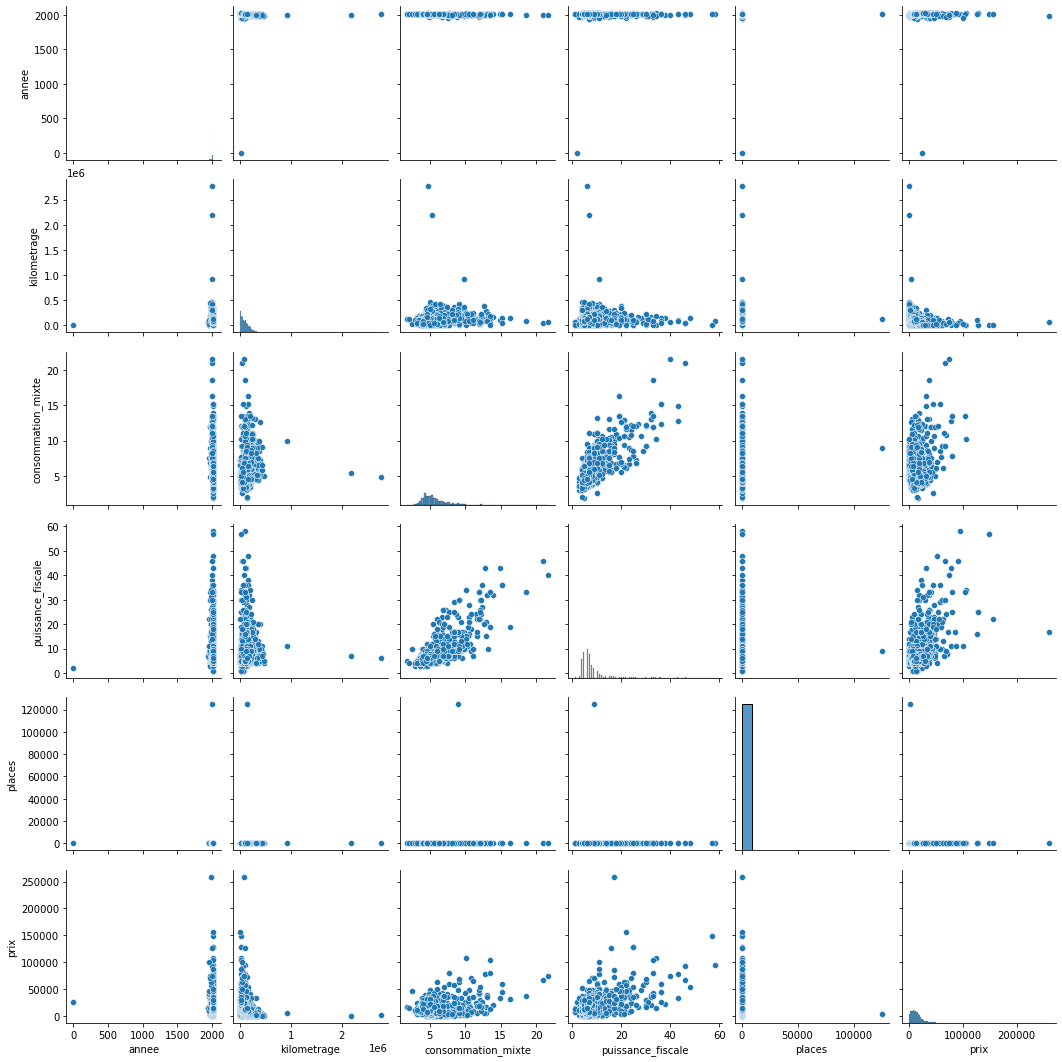

In [21]:
sns.pairplot(df)

C:\Users\Eric Bertrand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


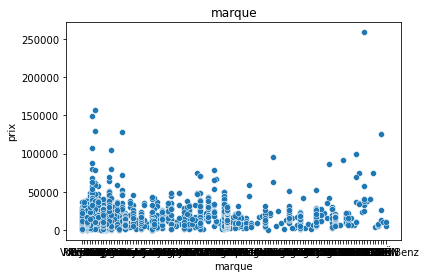

C:\Users\Eric Bertrand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


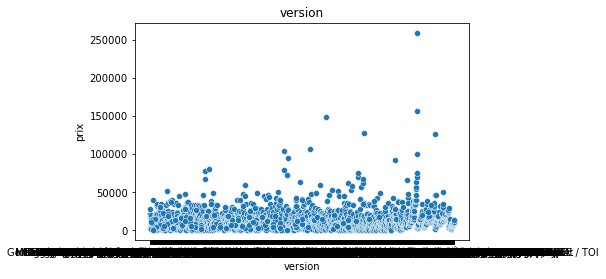

C:\Users\Eric Bertrand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


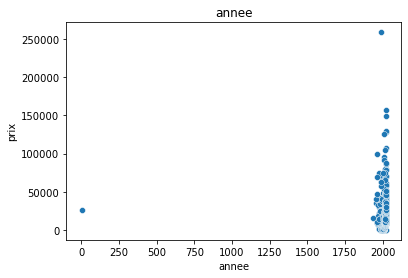

C:\Users\Eric Bertrand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


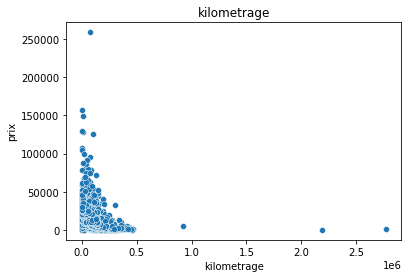

C:\Users\Eric Bertrand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


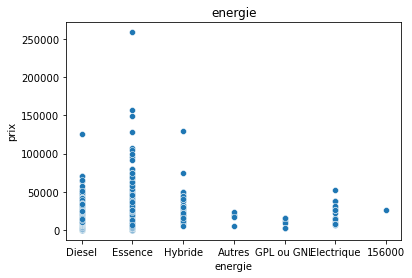

C:\Users\Eric Bertrand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


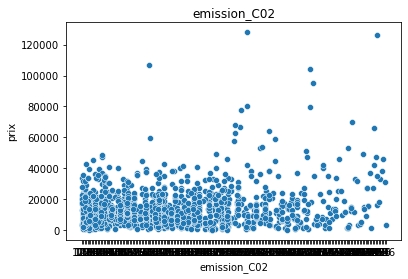

C:\Users\Eric Bertrand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


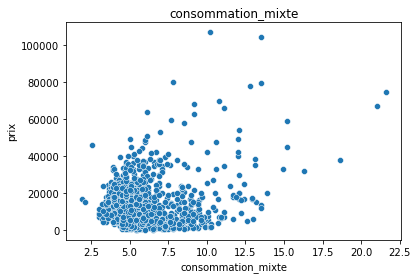

C:\Users\Eric Bertrand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


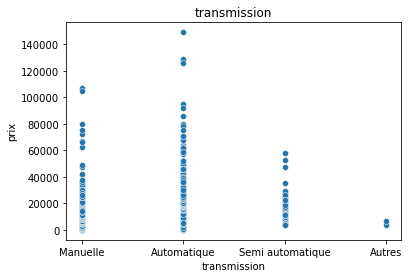

C:\Users\Eric Bertrand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


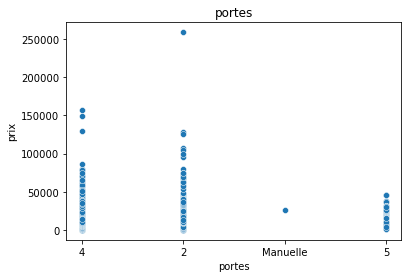

C:\Users\Eric Bertrand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


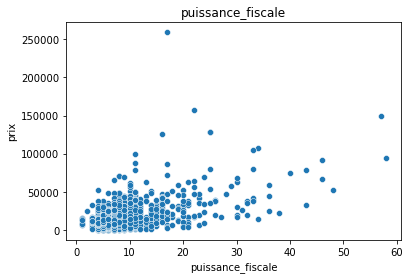

C:\Users\Eric Bertrand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


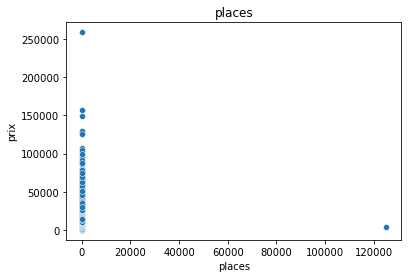

C:\Users\Eric Bertrand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


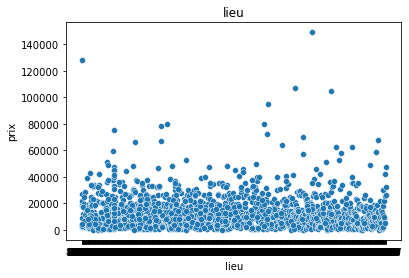

C:\Users\Eric Bertrand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


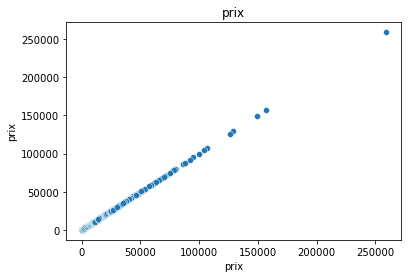

In [22]:
for i in df.keys():
    plt.title(i)
    sns.scatterplot(df[i],df['prix'])
    plt.show()

C:\Users\Eric Bertrand\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='prix', ylabel='Density'>

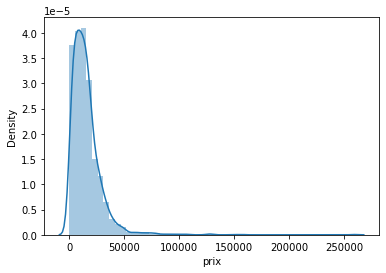

In [23]:
sns.distplot(df['prix'])

In [24]:
df.columns

Index(['marque', 'version', 'annee', 'kilometrage', 'energie', 'emission_C02',
       'consommation_mixte', 'transmission', 'portes', 'puissance_fiscale',
       'places', 'lieu', 'prix'],
      dtype='object')

In [25]:
from  feature_engine.encoding import OneHotEncoder

encoder = OneHotEncoder(variables=['energie', 'transmission','marque'])

# fit the encoder
df2 = encoder.fit_transform( df.drop(['version','emission_C02','consommation_mixte', 'lieu'], axis=1).dropna() )


C:\Users\Eric Bertrand\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  X[str(feature) + "_" + str(category)] = np.where(


In [26]:
df2[['annee', 'kilometrage',	'portes', 'puissance_fiscale', 'places', 'prix']] = df2[['annee', 'kilometrage', 'portes', 'puissance_fiscale', 'places', 'prix']].astype(int)



In [27]:
df2

,annee,kilometrage,portes,puissance_fiscale,places,prix,energie_Diesel,energie_Essence,energie_Hybride,energie_Autres,...,marque_NISSAN,marque_HYUNDAI,marque_SUZUKI,marque_ALFA,marque_VOLVO,marque_LAND,marque_CITROËN,marque_Mercedes-Benz,marque_Ds,marque_Bmw
0,2004,156000,4,5,5,3700,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2019,4700,4,7,5,18500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022,2000,4,5,5,21700,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1999,320000,4,6,5,2000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1986,96700,4,3,5,12000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,2019,95339,2,5,2,10900,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2461,2017,103382,4,5,2,10900,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2462,2018,85019,2,5,2,10990,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2463,2019,94734,2,5,5,13500,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##  Linear Regression

#### Self Analysis based feature

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import statsmodels.api as sm

In [29]:
y = df2['prix']
X = df2.drop(['prix'], axis=1)

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=42)

In [31]:
LR = LinearRegression()

In [32]:
LR.fit(X_train,y_train)

LinearRegression()

In [33]:
y_pred = LR.predict(X_test)

In [34]:
r2_score(y_pred,y_test)

0.28747120181223484

In [35]:
print('Coefficient are',LR.coef_)
print('intercept is',LR.intercept_)

Coefficient are [ 5.55336076e+02 -2.14906371e-02 -1.45232395e+02  1.37300289e+03
  3.91559210e-02 -2.71297812e+03 -3.06383682e+03  6.48331092e+03
 -1.39180989e+01 -3.91259747e+03  3.22001959e+03 -1.01827558e+02
  3.09449778e+03 -6.85460651e+02 -2.30720957e+03 -1.11684383e+03
  1.48455736e+03  9.15476148e+02  2.77408810e+03  1.09384745e+03
 -1.46262038e+03 -1.09648752e+03 -1.23573176e+03 -2.29091215e+03
  1.52191332e+03 -7.54813996e+02 -1.12170746e+03 -8.11304145e+03
  9.85159624e+02  9.07411916e+03 -2.03310577e+03 -7.08318035e+03
 -1.27533440e+04 -5.19282962e+02 -7.62566593e+03 -1.45464538e+04
 -1.02054214e+03  2.33987791e+04 -1.02830359e+04  2.42901419e+03
 -6.26703558e+02 -1.60321250e+03 -1.99784184e+03 -4.94671094e+03
  7.75922314e+02  5.09949394e+03  2.01150130e+03 -1.61489186e+03
  1.43664115e+04 -1.90195775e+02 -4.13032279e+03  1.34432666e+03
 -2.04664053e+03 -2.62398850e+03  1.50827793e-06  8.58525938e+01
  7.11112794e+03  1.02422960e+04  7.82738978e+03 -1.01961699e+03
 -3.92616

In [36]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   prix   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     39.65
Date:                Thu, 17 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:13:29   Log-Likelihood:                -22621.
No. Observations:                2196   AIC:                         4.546e+04
Df Residuals:                    2089   BIC:                         4.606e+04
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
annee         

###### We see the Regression LIne is in Best Fit

#### RFE selected Feature

In [37]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(X_train)

In [39]:
LR2 = LinearRegression()

In [40]:
rfe = RFE(LR2, 1)

C:\Users\Eric Bertrand\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [41]:
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=1)

In [42]:
X_train.columns[rfe.support_]

Index(['energie_Hybride'], dtype='object')

In [43]:
## Model Building
LR3 = LinearRegression()
LR3.fit(X_train1,y_train)
y_pred1 = LR.predict(X_train)
print("R2 score is",r2_score(y_pred,y_test))
print('Coefficient are',LR.coef_)
print('intercept is',LR.intercept_)

R2 score is 0.28747120181223484
Coefficient are [ 5.55336076e+02 -2.14906371e-02 -1.45232395e+02  1.37300289e+03
  3.91559210e-02 -2.71297812e+03 -3.06383682e+03  6.48331092e+03
 -1.39180989e+01 -3.91259747e+03  3.22001959e+03 -1.01827558e+02
  3.09449778e+03 -6.85460651e+02 -2.30720957e+03 -1.11684383e+03
  1.48455736e+03  9.15476148e+02  2.77408810e+03  1.09384745e+03
 -1.46262038e+03 -1.09648752e+03 -1.23573176e+03 -2.29091215e+03
  1.52191332e+03 -7.54813996e+02 -1.12170746e+03 -8.11304145e+03
  9.85159624e+02  9.07411916e+03 -2.03310577e+03 -7.08318035e+03
 -1.27533440e+04 -5.19282962e+02 -7.62566593e+03 -1.45464538e+04
 -1.02054214e+03  2.33987791e+04 -1.02830359e+04  2.42901419e+03
 -6.26703558e+02 -1.60321250e+03 -1.99784184e+03 -4.94671094e+03
  7.75922314e+02  5.09949394e+03  2.01150130e+03 -1.61489186e+03
  1.43664115e+04 -1.90195775e+02 -4.13032279e+03  1.34432666e+03
 -2.04664053e+03 -2.62398850e+03  1.50827793e-06  8.58525938e+01
  7.11112794e+03  1.02422960e+04  7.827389

In [44]:
print('Coefficient is',LR.coef_)
print('intercept is',LR.intercept_)

Coefficient is [ 5.55336076e+02 -2.14906371e-02 -1.45232395e+02  1.37300289e+03
  3.91559210e-02 -2.71297812e+03 -3.06383682e+03  6.48331092e+03
 -1.39180989e+01 -3.91259747e+03  3.22001959e+03 -1.01827558e+02
  3.09449778e+03 -6.85460651e+02 -2.30720957e+03 -1.11684383e+03
  1.48455736e+03  9.15476148e+02  2.77408810e+03  1.09384745e+03
 -1.46262038e+03 -1.09648752e+03 -1.23573176e+03 -2.29091215e+03
  1.52191332e+03 -7.54813996e+02 -1.12170746e+03 -8.11304145e+03
  9.85159624e+02  9.07411916e+03 -2.03310577e+03 -7.08318035e+03
 -1.27533440e+04 -5.19282962e+02 -7.62566593e+03 -1.45464538e+04
 -1.02054214e+03  2.33987791e+04 -1.02830359e+04  2.42901419e+03
 -6.26703558e+02 -1.60321250e+03 -1.99784184e+03 -4.94671094e+03
  7.75922314e+02  5.09949394e+03  2.01150130e+03 -1.61489186e+03
  1.43664115e+04 -1.90195775e+02 -4.13032279e+03  1.34432666e+03
 -2.04664053e+03 -2.62398850e+03  1.50827793e-06  8.58525938e+01
  7.11112794e+03  1.02422960e+04  7.82738978e+03 -1.01961699e+03
 -3.926162

In [45]:
## Selecting Top 7 Features
rfe = RFE(model, 7)
X_train1 = scaler.fit_transform(X_train)

C:\Users\Eric Bertrand\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [46]:
rfe.fit(X_train1,y_train)

TypeError: Cannot clone object '<statsmodels.regression.linear_model.OLS object at 0x00000144DB083F40>' (type <class 'statsmodels.regression.linear_model.OLS'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [ ]:
X_train.columns[rfe.support_]

Index(['wheelbase', 'enginesize', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg'],
      dtype='object')

In [ ]:
print("Num Features: %s" % (rfe.n_features_))
print("Selected Features: %s" % (rfe.support_))
print("Feature Ranking: %s" % (rfe.ranking_))

Num Features: 7
Selected Features: [False False  True False False False  True False False  True  True  True
  True  True False]
Feature Ranking: [7 8 1 6 5 2 1 9 3 1 1 1 1 1 4]


In [ ]:
#X = df1[{'symboling', 'fueltype', 'boreratio', 'compressionratio', 'citympg'}]
X = df1[{'wheelbase', 'enginesize', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg'}]
y = df1['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=42)

In [ ]:
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred1 = LR.predict(X_train)
print("R2 score is",r2_score(y_pred,y_test))
print('intercept is',LR.intercept_)
print('Coefficient are',LR.coef_)

R2 score is 0.7893322567743295
intercept is -20658.41919510295
Coefficient are [ 2.31543530e+00  3.24266517e+02  2.37727309e+01 -2.92917424e+03
 -2.56375397e+02  1.20048878e+02  1.72227678e+02]


In [ ]:
# Sérialisation du modèle pour export
# import pickle
# with open('voiture_model_LR.pkl','wb') as f:
#     pickle.dump(LR,f)

In [ ]:
# with open('voiture_model_Y_test.pkl','wb') as f:
#     pickle.dump(y_test,f)

In [ ]:
import pickle
with open('voiture_model_X_test.pkl','wb') as f:
    pickle.dump(X_test,f)


In [ ]:
X_test

,annee,kilometrage,portes,puissance_fiscale,places,energie_Diesel,energie_Essence,energie_Hybride,energie_Autres,energie_GPL ou GNL,...,marque_Subaru,marque_Saab,marque_RENAULT,marque_Smart,marque_Abarth,marque_JAGUAR,marque_KIA,marque_Mitsubishi,marque_Trafic,marque_FORD
122,2003,366459,4,12,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
404,2008,247,2,10,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
529,2012,100900,2,4,5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,2021,1790,4,6,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
449,2001,104000,2,4,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,1987,90000,4,8,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,2019,19700,4,7,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
210,2012,145000,4,5,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
267,2018,11200,2,10,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
